In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
gj_aci = pd.read_csv('data/광진구 교통사고 전체(2013~2023).csv')
gj_aci

,사고번호,발생년월,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,가해운전자 차종,가해운전자 성별,가해운전자 연령대,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령대,피해운전자 상해정도,발생년도,발생월
0,2.013120e+15,2013년 12월,일요일,서울특별시 광진구 중곡동,경상사고,0,0,2,0,차대차 - 기타,...,승용,남,41-50세,상해없음,원동기,남,41-50세,경상,2014,12
1,2.013120e+15,2013년 12월,일요일,서울특별시 광진구 자양동,중상사고,0,1,0,1,차대차 - 추돌,...,승용,남,31-40세,상해없음,승용,남,51-60세,상해없음,2014,12
2,2.013120e+15,2013년 12월,일요일,서울특별시 광진구 중곡동,중상사고,0,1,0,0,차대차 - 충돌,...,승용,남,31-40세,상해없음,원동기,남,13-20세,중상,2014,12
3,2.013120e+15,2013년 12월,일요일,서울특별시 광진구 자양동,경상사고,0,0,1,0,차대사람 - 횡단중,...,이륜,남,20세 이하,상해없음,보행자,남,13-20세,경상,2014,12
4,2.013120e+15,2013년 12월,일요일,서울특별시 광진구 구의동,경상사고,0,0,1,0,차대차 - 기타,...,승용,남,41-50세,상해없음,승용,남,21-30세,경상,2014,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10154,2.023113e+15,2023년 11월,화요일,서울특별시 광진구 자양동,경상사고,0,0,2,0,차대차 - 추돌,...,승용,남,31-40세,상해없음,승용,남,31-40세,경상,2023,11
10155,2.023113e+15,2023년 11월,수요일,서울특별시 광진구 구의동,경상사고,0,0,1,0,차대차 - 충돌,...,승용,여,51-60세,상해없음,승용,남,31-40세,경상,2023,11
10156,2.023110e+15,2023년 11월,목요일,서울특별시 광진구 화양동,경상사고,0,0,1,0,차대차 - 기타,...,승용,남,65세 이상,상해없음,이륜,여,21-30세,경상,2023,11
10157,2.023113e+15,2023년 11월,목요일,서울특별시 광진구 자양동,중상사고,0,1,0,0,차대사람 - 기타,...,승용,남,41-50세,상해없음,보행자,여,51-60세,중상,2023,11


In [3]:
gj_aci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10159 entries, 0 to 10158
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   사고번호        10159 non-null  float64
 1   발생년월        10159 non-null  object 
 2   요일          10159 non-null  object 
 3   시군구         10159 non-null  object 
 4   사고내용        10159 non-null  object 
 5   사망자수        10159 non-null  int64  
 6   중상자수        10159 non-null  int64  
 7   경상자수        10159 non-null  int64  
 8   부상신고자수      10159 non-null  int64  
 9   사고유형        10159 non-null  object 
 10  법규위반        10159 non-null  object 
 11  노면상태        10159 non-null  object 
 12  기상상태        10159 non-null  object 
 13  도로형태        10159 non-null  object 
 14  가해운전자 차종    10159 non-null  object 
 15  가해운전자 성별    10159 non-null  object 
 16  가해운전자 연령대   10159 non-null  object 
 17  가해운전자 상해정도  10159 non-null  object 
 18  피해운전자 차종    9830 non-null   object 
 19  피해운전자 성별    9830 non-null

In [4]:
# gj_aci['발생년도'] = gj_aci['발생년월'].str.split(' ', expand = True)[0].str.replace('년', '')
gj_aci['발생년도'] = gj_aci['발생년도'].astype('int')
# gj_aci['발생월'] = gj_aci['발생년월'].str.split(' ', expand = True)[1].str.replace('월', '')
gj_aci['발생월'] = gj_aci['발생월'].astype('int')

In [5]:
def split_season(a):
    if a // 3 == 1:
        return '봄'
    elif a // 3 == 2:
        return '여름'
    elif a // 3 == 3:
        return '가을'
    else:
        return '겨울'

발생계절
봄     2666
여름    2635
가을    2621
겨울    2237
Name: count, dtype: int64


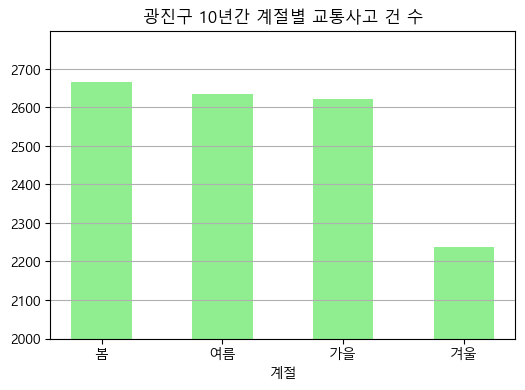

In [6]:
gj_aci['발생계절'] = gj_aci['발생월'].apply(split_season)
gj_aci_season = gj_aci['발생계절'].value_counts().reindex(['봄', '여름', '가을', '겨울'])
print(gj_aci_season)
plt.figure(figsize = (6,4))
plt.bar(gj_aci_season.index, gj_aci_season.values, color = 'lightgreen', width = 0.5)
plt.ylim(bottom = 2000)
plt.title('광진구 10년간 계절별 교통사고 건 수')
plt.grid(axis = 'y')
plt.xlabel('계절')
plt.show()

발생년도
2014    410
2015    326
2016    262
2017    267
2018    305
2019    245
2020    239
2021    232
2022    151
2023    198
Name: (발생월, 여름), dtype: int64


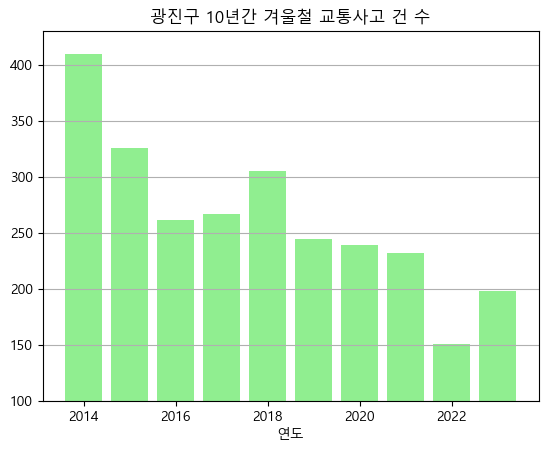

In [7]:
gj_aci_winter = gj_aci[['발생년도', '발생계절', '발생월']].groupby(['발생년도', '발생계절']).agg('count').unstack().iloc[:,3]
print(gj_aci_winter)
plt.bar(gj_aci_winter.index, gj_aci_winter.values, color = 'lightgreen')
plt.ylim(bottom = 100)
plt.title('광진구 10년간 겨울철 교통사고 건 수')
plt.grid(axis = 'y')
plt.xlabel('연도')
plt.show()

In [8]:
gj_aci_2014to23 = gj_aci[['발생년도', '발생계절', '발생월']].groupby(['발생년도', '발생계절']).agg('count').unstack()
gj_aci_2014to23.columns = ['가을', '겨울', '봄', '여름']
gj_aci_2014to23 = gj_aci_2014to23.reindex(['봄', '여름', '가을', '겨울'], axis = 1)
gj_aci_winter_ratio_whole = gj_aci_2014to23['겨울']/(gj_aci_2014to23['봄']+gj_aci_2014to23['여름']+gj_aci_2014to23['가을']+gj_aci_2014to23['겨울'])*100
gj_aci_winter_spau = gj_aci_2014to23['겨울']/((gj_aci_2014to23['봄']+gj_aci_2014to23['가을'])/2)*100

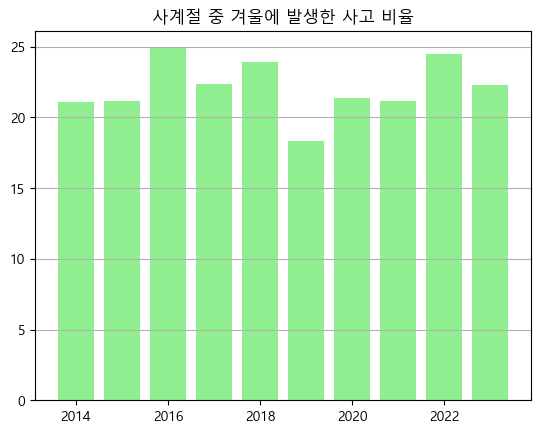

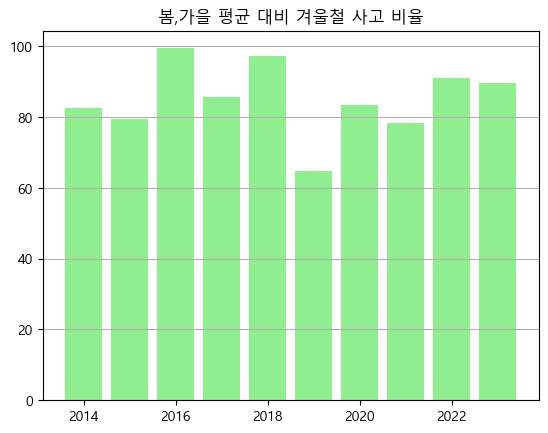

In [9]:
plt.bar(gj_aci_winter_ratio_whole.index, gj_aci_winter_ratio_whole.values, color = 'lightgreen')
plt.title('사계절 중 겨울에 발생한 사고 비율')
plt.grid(axis = 'y')
plt.show()

plt.bar(gj_aci_winter_spau.index, gj_aci_winter_spau.values, color = 'lightgreen')
plt.title('봄,가을 평균 대비 겨울철 사고 비율')
plt.grid(axis = 'y')
plt.show()

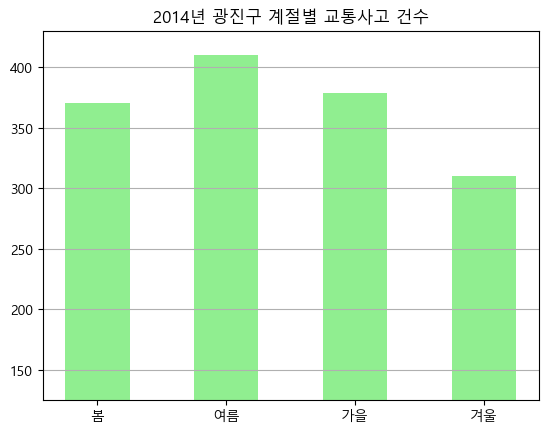

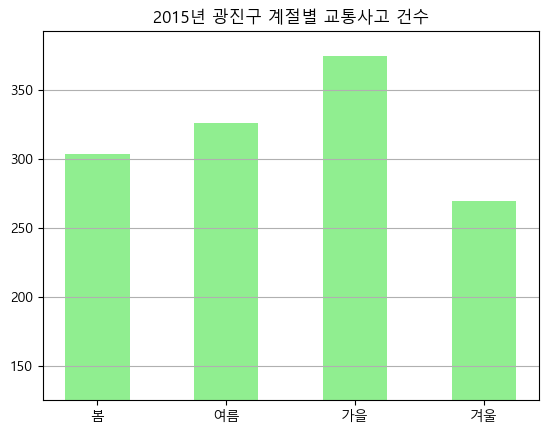

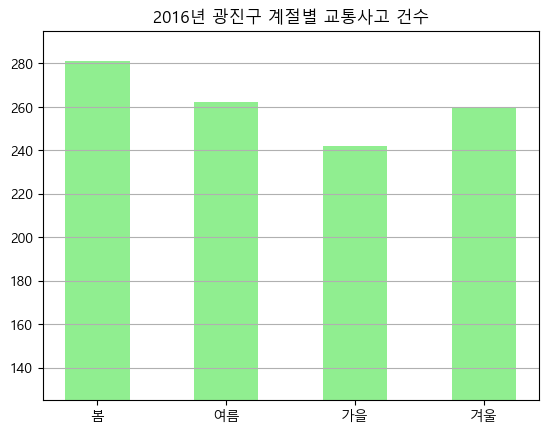

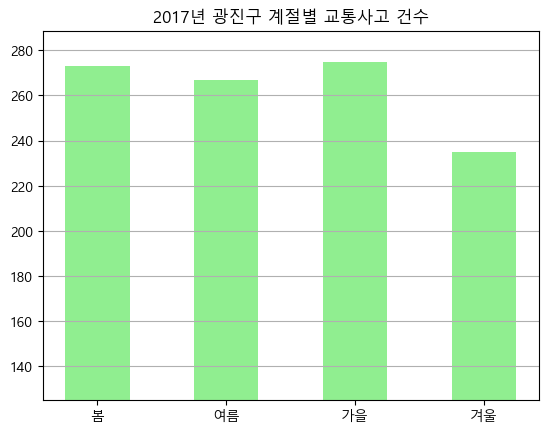

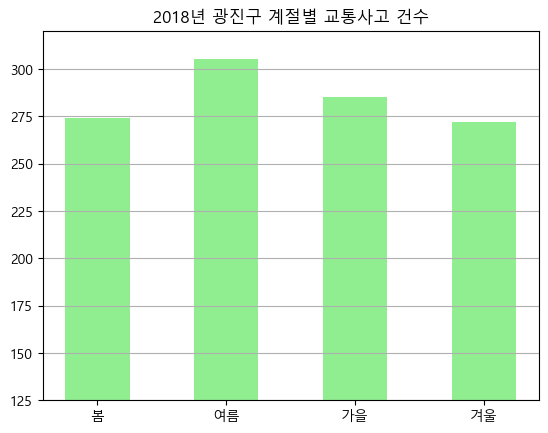

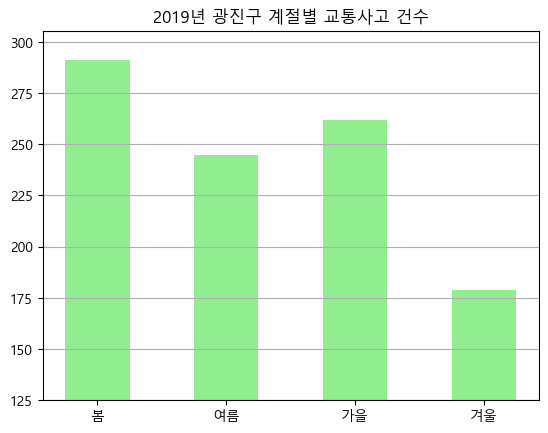

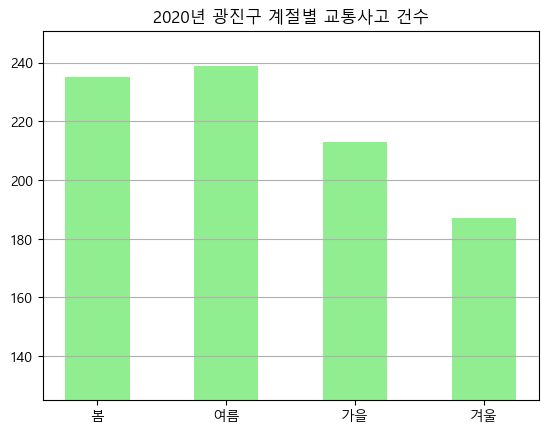

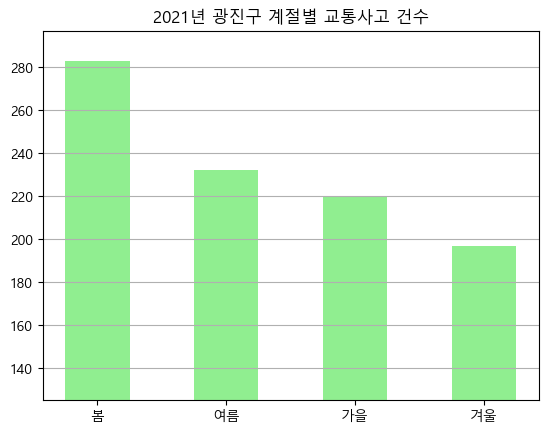

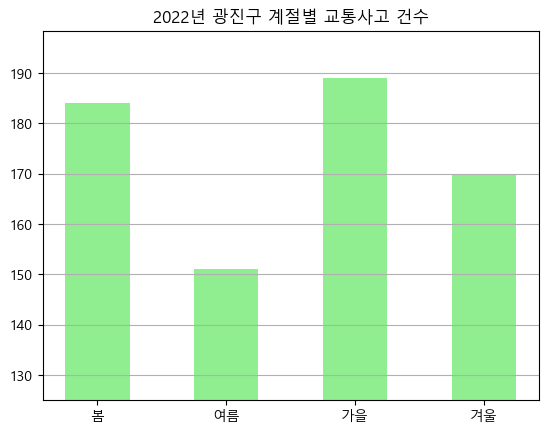

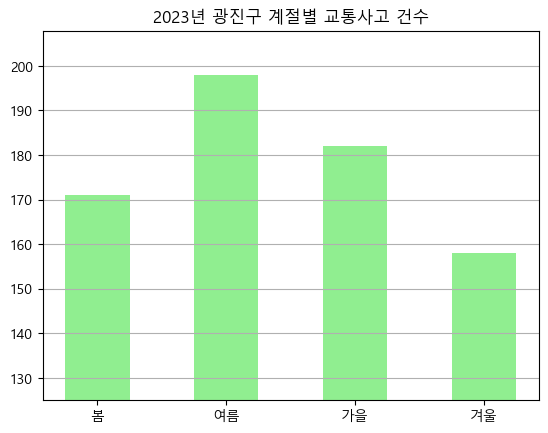

In [10]:
year = 2014
for i in range(len(gj_aci_2014to23)):
    gj_aci_2014to23_ = gj_aci_2014to23.iloc[i,:]
    plt.bar(gj_aci_2014to23_.index, gj_aci_2014to23_.values, width = 0.5, color = 'lightgreen')
    plt.title(f'{year+i}년 광진구 계절별 교통사고 건수')
    plt.ylim(bottom = 125)
    plt.grid(axis = 'y')
    plt.show()

In [31]:
gj_aci[['발생년도', '발생계절', '발생월']].groupby(['발생년도', '발생계절']).agg('count').unstack().columns

MultiIndex([('발생월', '가을'),
            ('발생월', '겨울'),
            ('발생월',  '봄'),
            ('발생월', '여름')],
           names=[None, '발생계절'])

In [39]:
df16_23 = pd.read_csv('data/2016~2023년 서울시 광진구 교통량 조사자료.csv')
df16_23

,일자,요일,지점명,지점번호,유입유출,방향,0시,1시,2시,3시,...,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
0,20160101,금,아차산로(워커힐),B-03,유출,광진교북단교차로->아차산로 서울구리시계,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20160102,토,아차산로(워커힐),B-03,유출,광진교북단교차로->아차산로 서울구리시계,164.0,139.0,83.0,66.0,...,703.0,691.0,674.0,656.0,630.0,450.0,479.0,463.0,382.0,283.0
2,20160103,일,아차산로(워커힐),B-03,유출,광진교북단교차로->아차산로 서울구리시계,212.0,133.0,107.0,97.0,...,643.0,630.0,699.0,623.0,455.0,313.0,371.0,394.0,267.0,218.0
3,20160104,월,아차산로(워커힐),B-03,유출,광진교북단교차로->아차산로 서울구리시계,130.0,90.0,70.0,46.0,...,634.0,652.0,703.0,751.0,1010.0,967.0,835.0,534.0,493.0,322.0
4,20160105,화,아차산로(워커힐),B-03,유출,광진교북단교차로->아차산로 서울구리시계,195.0,67.0,48.0,78.0,...,598.0,634.0,647.0,795.0,1007.0,686.0,662.0,577.0,501.0,366.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46589,20231227,수,동일로(군자교),D-07,유출,화양사거리->군자교동단,943.0,757.0,616.0,482.0,...,1765.0,1713.0,2099.0,2284.0,2432.0,2195.0,1924.0,1620.0,1469.0,1184.0
46590,20231228,목,동일로(군자교),D-07,유출,화양사거리->군자교동단,925.0,748.0,681.0,533.0,...,1775.0,1907.0,2081.0,2242.0,2475.0,2149.0,1997.0,1713.0,1542.0,1176.0
46591,20231229,금,동일로(군자교),D-07,유출,화양사거리->군자교동단,1074.0,853.0,667.0,571.0,...,1895.0,2037.0,2249.0,2207.0,2417.0,2222.0,1770.0,1499.0,1474.0,1250.0
46592,20231230,토,동일로(군자교),D-07,유출,화양사거리->군자교동단,1076.0,909.0,754.0,620.0,...,1302.0,1243.0,1253.0,1210.0,1039.0,933.0,849.0,883.0,858.0,600.0


In [41]:
df16_23['연도'] = df16_23['일자'].astype('str').str[:4]
df16_23['월'] = df16_23['일자'].astype('str').str[4:6]
df16_23 = df16_23[['일자', '연도', '월', '요일', '지점명', '지점번호', '유입유출', '방향', '0시', '1시', '2시', '3시', '4시',
       '5시', '6시', '7시', '8시', '9시', '10시', '11시', '12시', '13시', '14시', '15시',
       '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시']]
df16_23['일일통행량'] = df16_23.iloc[:, 8:-1].agg('sum', axis = 1).astype('int')
df16_23

C:\Users\smhrd\AppData\Local\Temp\ipykernel_17132\2275617044.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df16_23['일일통행량'] = df16_23.iloc[:, 8:-1].agg('sum', axis = 1).astype('int')


,일자,연도,월,요일,지점명,지점번호,유입유출,방향,0시,1시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,일일통행량
0,20160101,2016,01,금,아차산로(워커힐),B-03,유출,광진교북단교차로->아차산로 서울구리시계,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1656
1,20160102,2016,01,토,아차산로(워커힐),B-03,유출,광진교북단교차로->아차산로 서울구리시계,164.0,139.0,...,691.0,674.0,656.0,630.0,450.0,479.0,463.0,382.0,283.0,9287
2,20160103,2016,01,일,아차산로(워커힐),B-03,유출,광진교북단교차로->아차산로 서울구리시계,212.0,133.0,...,630.0,699.0,623.0,455.0,313.0,371.0,394.0,267.0,218.0,8203
3,20160104,2016,01,월,아차산로(워커힐),B-03,유출,광진교북단교차로->아차산로 서울구리시계,130.0,90.0,...,652.0,703.0,751.0,1010.0,967.0,835.0,534.0,493.0,322.0,11303
4,20160105,2016,01,화,아차산로(워커힐),B-03,유출,광진교북단교차로->아차산로 서울구리시계,195.0,67.0,...,634.0,647.0,795.0,1007.0,686.0,662.0,577.0,501.0,366.0,11007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46589,20231227,2023,12,수,동일로(군자교),D-07,유출,화양사거리->군자교동단,943.0,757.0,...,1713.0,2099.0,2284.0,2432.0,2195.0,1924.0,1620.0,1469.0,1184.0,31270
46590,20231228,2023,12,목,동일로(군자교),D-07,유출,화양사거리->군자교동단,925.0,748.0,...,1907.0,2081.0,2242.0,2475.0,2149.0,1997.0,1713.0,1542.0,1176.0,31880
46591,20231229,2023,12,금,동일로(군자교),D-07,유출,화양사거리->군자교동단,1074.0,853.0,...,2037.0,2249.0,2207.0,2417.0,2222.0,1770.0,1499.0,1474.0,1250.0,32389
46592,20231230,2023,12,토,동일로(군자교),D-07,유출,화양사거리->군자교동단,1076.0,909.0,...,1243.0,1253.0,1210.0,1039.0,933.0,849.0,883.0,858.0,600.0,22365


In [51]:
df16_23_daymean = df16_23[['연도', '월', '지점번호', '유입유출', '일일통행량']].groupby(['연도', '월', '지점번호', '유입유출'], as_index = False).agg('mean')
df16_23_daymean['일일통행량'] = df16_23_daymean['일일통행량'].astype('int')
df16_23_daymean

,연도,월,지점번호,유입유출,일일통행량
0,2016,01,B-03,유출,10190
1,2016,01,C-16,유입,59989
2,2016,01,C-16,유출,54977
3,2016,01,C-17,유입,57842
4,2016,01,C-17,유출,58010
...,...,...,...,...,...
1597,2023,12,C-20,유출,32751
1598,2023,12,C-21,유입,7566
1599,2023,12,C-21,유출,5127
1600,2023,12,D-07,유입,26849


In [53]:
df16_23_monthmean = df16_23_daymean[['연도', '월', '일일통행량']].groupby(['연도', '월'], as_index = False).agg('mean')
df16_23_monthmean['일일통행량'] = df16_23_monthmean['일일통행량'].astype('int')
df16_23_monthmean

,연도,월,일일통행량
0,2016,01,42024
1,2016,02,42308
2,2016,03,36887
3,2016,04,42922
4,2016,05,40284
...,...,...,...
91,2023,08,40172
92,2023,09,40596
93,2023,10,37896
94,2023,11,39227


In [55]:
def split_season(a):
    if a // 3 == 1:
        return '봄'
    elif a // 3 == 2:
        return '여름'
    elif a // 3 == 3:
        return '가을'
    else:
        return '겨울'

In [57]:
df16_23_monthmean['연도'] = df16_23_monthmean['연도'].astype('int')
df16_23_monthmean['월'] = df16_23_monthmean['월'].astype('int')

df16_23_monthmean.iloc[(df16_23_monthmean[df16_23_monthmean['월'] == '12']['연도'].astype('int') + 1).index,0] += 1
df16_23_monthmean.loc[95, '연도'] = 2016
df16_23_monthmean.sort_values(by = ['연도', '월'], inplace = True)
df16_23_monthmean['계절'] = df16_23_monthmean['월'].apply(split_season)
df16_23_monthmean

,연도,월,일일통행량,계절
0,2016,1,42024,겨울
1,2016,2,42308,겨울
2,2016,3,36887,봄
3,2016,4,42922,봄
4,2016,5,40284,봄
...,...,...,...,...
90,2023,7,40027,여름
91,2023,8,40172,여름
92,2023,9,40596,가을
93,2023,10,37896,가을
